<a href="https://colab.research.google.com/github/raushan9jnv/MachineLearning-Projects/blob/main/Prediction%20of%20marks%20using%20Data%20Science/Prediction_of_marks_using_Data_Science.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Prediction using Supervised ML

To predict the percentage of marks of an student based on the number of study hours.

In [3]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
#Reading the dataset from remote link
url ='http://bit.ly/w-data'
s_data = pd.read_csv(url)
print("Data imported Successfully")

s_data.head(10)

Data imported Successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


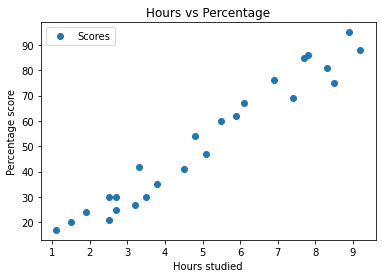

In [18]:
#plotting the distribution of scores
s_data.plot(x='Hours', y= 'Scores', style ='o')
plt.title('Hours vs Percentage')
plt.xlabel('Hours studied')
plt.ylabel('Percentage score')
plt.show()

**From the graph above, we can learly see that there is a positive linear relation between the number of hours studied and percentage of score.**

###Preparing the data

The Next step is to divide the data into 'Attributes' (inputs) and 'labels'  (outputs).

In [19]:
X = s_data.iloc[:,:-1].values
y= s_data.iloc[:,1].values

Now that we have our attributes and labels, the next step is to split this data into training and test sets. we will do this by using Scikit-Learn built-in train_test_split() method:

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 0)

### Training the Algorithm

We have split our data into training and testing sets, and now is finally the time to train our algorithm.

In [22]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train,y_train)

print("training complete")

training complete


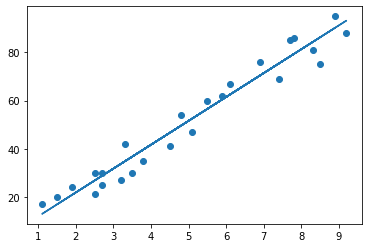

In [24]:
#plotting the regression line
line = regressor.coef_* X + regressor.intercept_  # y= mx+ c

#plotting for the test data
plt.scatter(X,y)
plt.plot(X,line)
plt.show()

### Making Predictions

now that we have trained our algorithm, it's time to make some predictions.

In [25]:
print(X_test)  # testing data - in hours
y_pred = regressor.predict(X_test) # Predicting the scores

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [27]:
#Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [29]:
score_pred = np.array([9.25])
score_pred = score_pred.reshape(-1,1)
predict = regressor.predict(score_pred)
print('No of hours{}'.format(9.25))
print('PridictedScore{}'.format(predict[0]))

No of hours9.25
PridictedScore93.69173248737539


### Evaluating the model

The final step is to evaluate the performance of algorith. This step is particulary important to compare how well different algorithm perform on a particular dataset.For simplicity here, we have chosen the mean square error.There are many such metrics.

In [31]:
from sklearn import metrics
print('Mean Absolute error: ', metrics.mean_absolute_error(y_test, y_pred))

Mean Absolute error:  4.183859899002982
